In [ ]:
# פייגי הרטמן 322681735
# הדר חלאווה 323809798


In [ ]:
# Import all the libraries that we shall be using
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import plotly

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Import labels (for the whole dataset, both training and testing)
y = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/למידת מכונה/type.csv')
print(y.shape)
y.head()

(99, 2)


,patient,type
0,1,H
1,2,H
2,3,H
3,4,H
4,5,H


In [ ]:
y['type'].value_counts()

H    50
M    49
Name: type, dtype: int64

In [ ]:
# Recode label to numeric
y = y.replace({'H':0,'M':1})
labels = ['H', 'M'] # for plotting convenience later on

In [ ]:
# Import data
df= pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/למידת מכונה/AMI_GSE66360_series_matrix.csv')
df= df.set_index('Class')

df=df.loc[:,~df.columns.duplicated()].copy()#Downloads repeating patterns
df.dropna(axis=0, inplace=True)
df.head()


,H,H.1,H.2,H.3,H.4,H.5,H.6,H.7,H.8,H.9,...,M.39,M.40,M.41,M.42,M.43,M.44,M.45,M.46,M.47,M.48
Class,,,,,,,,,,,,,,,,,,,,,
1007_s_at,5.866378,4.948736,5.148384,5.064419,5.017833,5.116154,5.431328,5.235271,5.773528,6.016415,...,5.419482,5.057716,5.996493,5.343133,5.558892,6.472517,5.678816,5.653286,6.013841,5.465334
1053_at,8.225790,7.525865,7.764637,7.198461,7.831450,7.203592,7.694551,7.760259,8.279814,7.580841,...,7.226348,7.105538,5.354105,8.271500,5.963346,8.261422,6.925753,7.918424,7.442701,9.225221
117_at,6.179732,6.628137,5.859151,5.974135,6.793079,6.435229,6.320546,6.483590,6.387779,6.307066,...,6.789501,7.441940,7.026929,6.003973,7.474326,6.367759,6.835756,7.577035,7.147417,6.481128
121_at,6.179478,6.582889,6.602135,6.545905,5.911542,6.285420,6.562316,6.345888,6.272806,5.971847,...,6.513437,6.317523,7.413453,6.809103,5.949091,6.440978,6.955883,6.499215,6.587065,6.897591
1255_g_at,2.792048,2.695714,2.580181,2.712124,2.723687,2.706684,2.674747,2.635150,2.696649,2.802863,...,2.924658,2.714103,3.635945,2.710944,2.979381,3.730139,2.914868,3.013901,2.729320,3.151449


In [ ]:
df=df.T  #שחלוף טבלה
df.head()

Class,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
H,5.866378,8.225790,6.179732,6.179478,2.792048,9.290411,6.998285,5.348944,10.742427,7.270561,...,13.257325,13.266235,14.571230,14.276568,4.504659,3.139334,2.747015,2.651554,3.413429,3.140612
H.1,4.948736,7.525865,6.628137,6.582889,2.695714,9.462275,6.558215,5.410884,9.865655,4.810195,...,13.593860,13.517013,14.738834,14.341233,4.409226,3.039961,2.638606,2.643615,3.399063,3.132691
H.2,5.148384,7.764637,5.859151,6.602135,2.580181,9.116776,6.851623,5.254073,10.148454,7.822844,...,13.372759,13.416583,14.627181,14.318568,4.310076,3.220109,2.495261,2.626028,3.539970,3.698396
H.3,5.064419,7.198461,5.974135,6.545905,2.712124,9.134584,7.357827,5.242140,10.879913,5.690417,...,13.490226,13.494827,14.754124,14.363297,4.439311,3.263782,2.544199,2.504958,3.396225,3.638612
H.4,5.017833,7.831450,6.793079,5.911542,2.723687,9.582344,7.283873,5.219484,10.090525,7.089369,...,13.236785,13.330192,14.548389,14.263677,4.562883,3.138524,2.506630,2.609707,3.434720,3.577649


In [ ]:
df = df.reset_index(drop=True)#התאמת האינדקסים בין הדאטא לסיווגים
y = y.reset_index(drop=True)
df.head()

Class,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,5.866378,8.225790,6.179732,6.179478,2.792048,9.290411,6.998285,5.348944,10.742427,7.270561,...,13.257325,13.266235,14.571230,14.276568,4.504659,3.139334,2.747015,2.651554,3.413429,3.140612
1,4.948736,7.525865,6.628137,6.582889,2.695714,9.462275,6.558215,5.410884,9.865655,4.810195,...,13.593860,13.517013,14.738834,14.341233,4.409226,3.039961,2.638606,2.643615,3.399063,3.132691
2,5.148384,7.764637,5.859151,6.602135,2.580181,9.116776,6.851623,5.254073,10.148454,7.822844,...,13.372759,13.416583,14.627181,14.318568,4.310076,3.220109,2.495261,2.626028,3.539970,3.698396
3,5.064419,7.198461,5.974135,6.545905,2.712124,9.134584,7.357827,5.242140,10.879913,5.690417,...,13.490226,13.494827,14.754124,14.363297,4.439311,3.263782,2.544199,2.504958,3.396225,3.638612
4,5.017833,7.831450,6.793079,5.911542,2.723687,9.582344,7.283873,5.219484,10.090525,7.089369,...,13.236785,13.330192,14.548389,14.263677,4.562883,3.138524,2.506630,2.609707,3.434720,3.577649


In [ ]:
y.head()

,patient,type
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [ ]:
column_names = list(df.columns.values)#שם ברשימה את כל שמות בגנים שבשורה 0
X=df[column_names] # Features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)#חלוקה לבדיקה ואימון
print(f"No. of training examples: {X_train.shape[0]}")
print(f"No. of testing examples: {X_test.shape[0]}")

No. of training examples: 74
No. of testing examples: 25


In [ ]:
X_train.head()

Class,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
21,5.151583,8.146644,7.188136,6.498877,2.719151,9.623223,7.240839,5.044224,10.900260,7.694166,...,13.357978,13.379655,14.548389,14.265998,4.102508,3.058083,2.506128,2.546095,3.318993,3.268287
82,5.916523,8.091684,6.285222,6.187347,2.937852,8.667433,6.246750,5.828652,10.452521,6.893474,...,13.813688,13.618776,14.816697,14.767603,4.706225,3.141479,2.777563,2.803027,3.757051,4.000071
76,6.726176,7.992438,6.539077,8.217956,3.542317,8.271136,7.075745,6.094306,7.927180,5.213440,...,14.312762,14.201763,14.878052,14.783801,5.431488,3.302109,2.970791,2.766066,3.929444,4.095565
24,5.283399,7.527726,6.078463,6.203988,2.746370,9.365585,6.778831,5.444919,10.842699,5.524140,...,13.374611,13.420165,14.595122,14.302532,4.503338,3.509342,2.784394,2.644276,3.591199,3.613409
57,5.294502,7.795721,6.206369,6.708165,2.887450,8.756182,6.482339,5.247683,10.908546,5.965103,...,13.891013,13.714989,14.881005,14.763890,4.655163,3.031070,2.628416,2.613903,3.361439,3.434993


In [ ]:
X_test.head()

Class,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
54,5.025702,7.568931,5.877905,6.772311,2.855276,8.204286,6.124038,5.158545,10.342055,4.096832,...,14.186865,14.115996,14.859112,14.815835,4.592695,2.833643,2.547798,2.388043,3.479904,3.294335
29,5.138168,7.371918,6.494238,6.325854,3.247414,9.428619,6.756135,5.366277,9.514952,7.196097,...,13.574038,13.099522,14.882728,14.726724,4.617609,3.337521,2.873668,2.751076,3.517052,3.775429
33,6.061936,7.830074,9.281038,7.014391,3.344039,9.835995,6.303810,5.911897,11.233233,6.015932,...,13.831351,13.508686,14.882728,14.785513,5.455057,3.738297,3.080666,2.958023,3.932312,4.435344
64,5.669553,8.219957,7.191427,7.337136,2.780998,7.920403,5.617247,5.742987,8.158588,4.209336,...,14.233688,14.177550,14.845194,14.778166,4.818071,3.363408,2.871947,2.816448,3.571223,3.569877
72,5.344029,8.714694,7.504154,6.469703,2.897627,8.275395,6.361332,5.803101,10.572793,4.396538,...,13.866354,13.601794,14.851408,14.774343,4.776914,3.653516,3.293834,2.953917,3.786376,4.320802


In [ ]:
y_train.head()

,patient,type
21,22,1
82,83,0
76,77,0
24,25,1
57,58,0


In [ ]:
y_test.head()

,patient,type
54,55,0
29,30,1
33,34,1
64,65,1
72,73,1


In [ ]:
# Convert from integer to float
X_train_fl = X_train.astype(float, 64)
X_test_fl = X_test.astype(float, 64)

# Apply the same scaling to both datasets
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train_fl)
X_test_scl = scaler.transform(X_test_fl) # note that we transform rather than fit_transform

In [ ]:
pca = PCA()
pca.fit_transform(X_train)

array([[-7.12428753e+01, -7.34204359e+00, -4.10390914e+01, ...,
        -7.98993497e+00, -1.76589660e+00,  1.79170144e-13],
       [-6.86161659e+00, -3.61695538e+01,  2.63485964e+00, ...,
        -1.23283757e-01, -4.85433088e-01,  1.79170144e-13],
       [ 2.35034227e+02, -8.00161996e+01, -2.97715704e+01, ...,
         1.44156345e-01,  2.99585961e-01,  1.79170144e-13],
       ...,
       [-3.69297722e+01, -3.10679822e+01,  5.73915551e+01, ...,
        -3.95457228e-01, -2.30689036e+00,  1.79170144e-13],
       [ 1.43359512e+02, -6.97800422e+01,  1.15178902e+02, ...,
         2.33136493e-01,  2.76308683e-01,  1.79170144e-13],
       [-9.09969919e+01,  1.69621106e+01, -4.47209862e+01, ...,
        -6.42022344e-01, -7.43256814e-01,  1.79170144e-13]])

42 features explain around 90% of the variance. From 54,628 features to 42, not too bad.


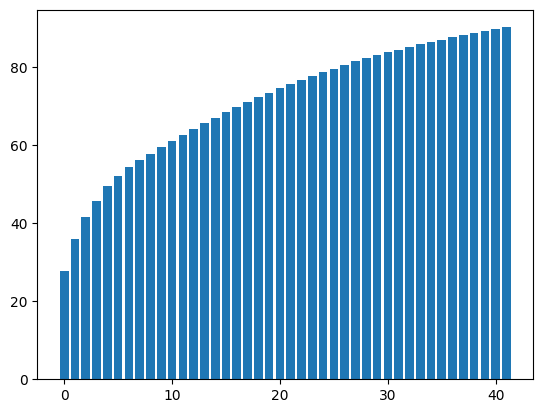

In [ ]:
#נרצה להוריד מימדים כך שמספר המימדים החדש יסביר 90% מהשונות
#בדיקה כמה מימדים יסבירו 90% מהשונות:
total = sum(pca.explained_variance_)
k = 0
current_variance = 0
while current_variance/total < 0.9:
    current_variance += pca.explained_variance_[k]
    k = k + 1

print(k, " features explain around 90% of the variance. From 54,628 features to ", k, ", not too bad.", sep='')

#pca
#והורדת מימדים ל
#k
pca = PCA(n_components=k)
X_train.pca = pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

var_exp = pca.explained_variance_ratio_.cumsum()
var_exp = var_exp*100
plt.bar(range(k), var_exp);

**:מודלים**

ננסה מודלים שונים לחיזוי על בסיס ביטוי גנים האם הפציינט צפוי ללקות בהתקף לב או לא.

אנו רוצות לראות האם הורדת המימדים באמצעות ה

pca

אכן סייעה לחיזוי טוב יותר של הנתונים, לכן נריץ כל מודל על הדאטא המקורי ועל
הדאטא לאחר הורדת המימדים ונשווה בין התוצאות.

**Naive Bayes**


Naive Bayes accuracy: 0.68


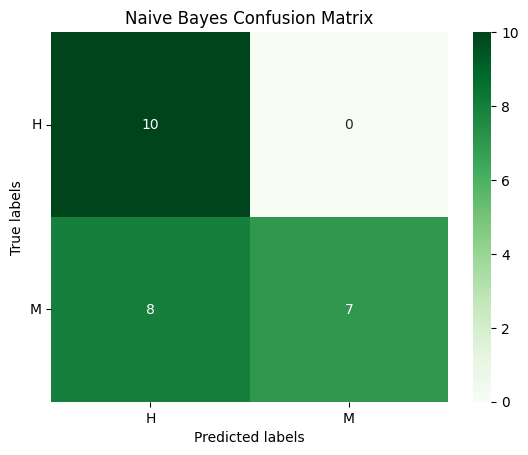

In [ ]:

# Create a Gaussian classifier
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.iloc[:,1])

nb_pred = nb_model.predict(X_test)

print('Naive Bayes accuracy:', round(accuracy_score(y_test.iloc[:,1], nb_pred), 3))

cm_nb =  confusion_matrix(y_test.iloc[:,1], nb_pred)

ax = plt.subplot()
sns.heatmap(cm_nb, annot=True, ax = ax, fmt='g', cmap='Greens')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Naive Bayes Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels, rotation=360);

Naive Bayes- by using pca variation dataset.

Naive Bayes accuracy whith pca vatiation: 0.68


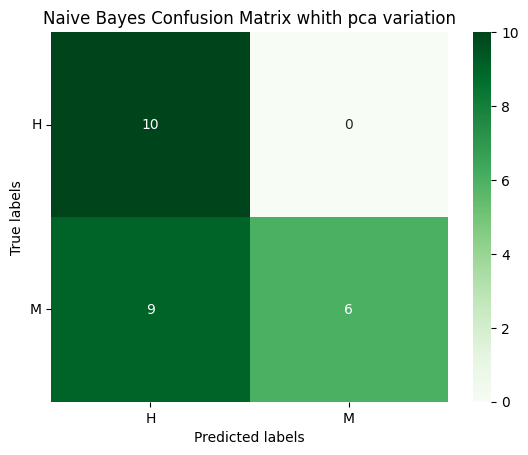

In [ ]:
# Create a Gaussian classifier
nb_model_pca = GaussianNB()

nb_model_pca.fit(X_train_pca, y_train.iloc[:,1])

nb_pred_pca = nb_model_pca.predict(X_test_pca)

print('Naive Bayes accuracy whith pca vatiation:', round(accuracy_score(y_test.iloc[:,1], nb_pred), 3))

cm_nb_pca =  confusion_matrix(y_test.iloc[:,1], nb_pred_pca)

ax = plt.subplot()
sns.heatmap(cm_nb_pca, annot=True, ax = ax, fmt='g', cmap='Greens')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Naive Bayes Confusion Matrix whith pca variation')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels, rotation=360);

**Logistic Regression**


Best Parameters:
 {'C': 0.1, 'penalty': 'l1'}
Logistic Regression accuracy: 0.84


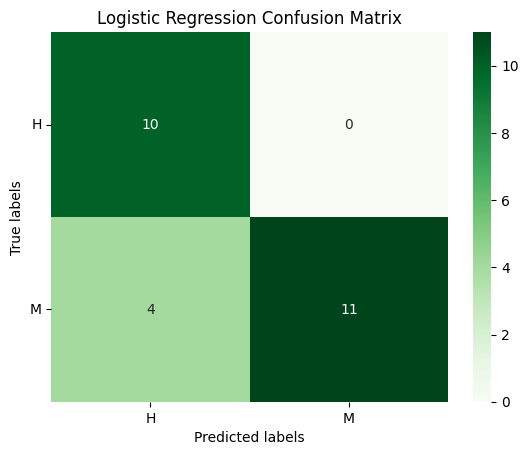

In [ ]:
#נבדוק מהם ההיפר פרמטרים שיתנו את התוצאות הטובות ביותר
log_grid = {'C': [1e-03, 1e-2, 1e-1, 1, 10],
                 'penalty': ['l1', 'l2']}

log_estimator = LogisticRegression(solver='liblinear')

log_model = GridSearchCV(estimator=log_estimator,
                  param_grid=log_grid,
                  cv=3,
                  scoring='accuracy')
#התאמת המודל לדאטא שלנו
log_model.fit(X_train, y_train.iloc[:,1])

print("Best Parameters:\n", log_model.best_params_)

# Select best log model
best_log = log_model.best_estimator_

# Make predictions using the optimised parameters
log_pred = best_log.predict(X_test)

print('Logistic Regression accuracy:', round(accuracy_score(y_test.iloc[:,1], log_pred), 3))

cm_log =  confusion_matrix(y_test.iloc[:,1], log_pred)

ax = plt.subplot()
sns.heatmap(cm_log, annot=True, ax = ax, fmt='g', cmap='Greens')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Logistic Regression Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels, rotation=360);

https://www.youtube.com/watch?v=eZ98q7iOUAA
הסבר על
GridSearchCV

Logistic Regression-
by using pca variation dataset

Best Parameters:
 {'C': 10, 'penalty': 'l2'}
Logistic Regression accuracy whith pca variation: 0.76


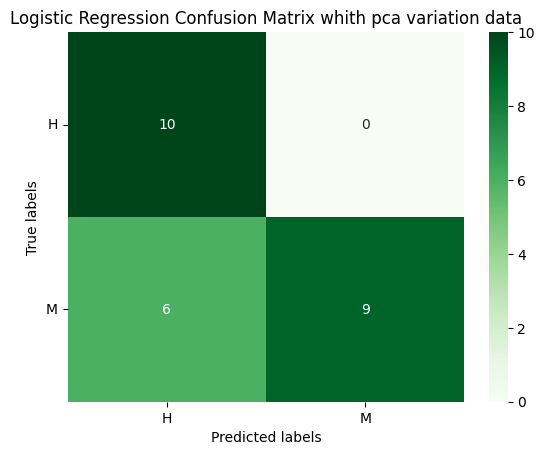

In [ ]:
#בחירת היפר פרמטרים טובים:
log_model_pca = GridSearchCV(estimator=log_estimator,
                  param_grid=log_grid,
                  cv=3,
                  scoring='accuracy')
#התאמת המודל לדאטא
log_model_pca.fit(X_train_pca, y_train.iloc[:,1])

print("Best Parameters:\n", log_model_pca.best_params_)

# Select best log model
best_log_pca = log_model_pca.best_estimator_

# Make predictions using the optimised parameters
log_pred_pca = best_log_pca.predict(X_test_pca)

print('Logistic Regression accuracy whith pca variation:', round(accuracy_score(y_test.iloc[:,1], log_pred_pca), 3))

cm_log_pca =  confusion_matrix(y_test.iloc[:,1], log_pred_pca)

ax = plt.subplot()
sns.heatmap(cm_log_pca, annot=True, ax = ax, fmt='g', cmap='Greens')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Logistic Regression Confusion Matrix whith pca variation data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels, rotation=360);

**Support Vector Machine**

הרצת המודל על הדאטא המקורי לקחה יותר מידי זמן לכן נוריד מודל זה מהבדיקה האם הורדת המימדים באמצעות

pca

אכן מסייעת לחיזוי טוב יותר.

Support Vector Machine-whith pca variation dataset


Best Parameters:
 {'C': 0.1, 'decision_function_shape': 'ovo', 'gamma': 1, 'kernel': 'linear'}
SVM accuracy whith pca variation data: 0.72


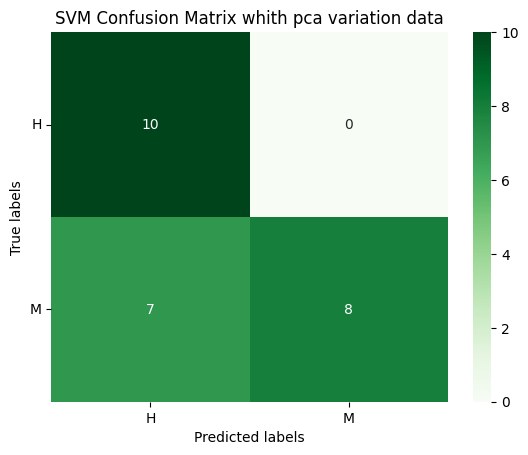

In [ ]:
# בחירת היפר פרמטרים טובים
svm_param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10], "kernel": ["linear", "rbf", "poly"], "decision_function_shape" : ["ovo", "ovr"]}
svm_grid_pca = GridSearchCV(SVC(), svm_param_grid, cv=3)

# התאמת המודל
svm_grid_pca.fit(X_train_pca, y_train.iloc[:,1])

print("Best Parameters:\n", svm_grid_pca.best_params_)

# Select best svc
best_svc_pca = svm_grid_pca.best_estimator_

# Make predictions using the optimised parameters
svm_pred_pca = best_svc_pca.predict(X_test_pca)

print('SVM accuracy whith pca variation data:', round(accuracy_score(y_test.iloc[:,1], svm_pred_pca), 3))

cm_svm_pca =  confusion_matrix(y_test.iloc[:,1], svm_pred_pca)

ax = plt.subplot()
sns.heatmap(cm_svm_pca, annot=True, ax = ax, fmt='g', cmap='Greens')

# Labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('SVM Confusion Matrix whith pca variation data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels, rotation=360);

**Decision Tree**


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
18 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_par

Best Parameters:
 {'criterion': 'gini', 'max_depth': 10, 'splitter': 'random'}
Decision Tree classifer accuracy: 0.92


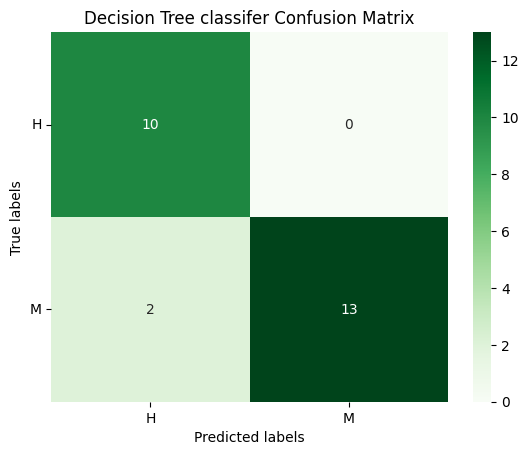

In [ ]:
#בחירת היפר פרמטרים

dt_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
                 'splitter': ['best', 'random'],
           'max_depth':[5,10,20,'None'],
           }

dt_estimator = DecisionTreeClassifier()

dt_model = GridSearchCV(estimator=dt_estimator,
                  param_grid=dt_grid,
                  cv=3,
                  scoring='accuracy')
#התאמת המודל
dt_model.fit(X_train, y_train.iloc[:,1])

print("Best Parameters:\n", dt_model.best_params_)

# Select best log model
best_dt = dt_model.best_estimator_

# Make predictions using the optimised parameters
dt_pred = best_dt.predict(X_test)

print('Decision Tree classifer accuracy:', round(accuracy_score(y_test.iloc[:,1], dt_pred), 3))

cm_dt =  confusion_matrix(y_test.iloc[:,1], dt_pred)

ax = plt.subplot()
sns.heatmap(cm_dt, annot=True, ax = ax, fmt='g', cmap='Greens')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Decision Tree classifer Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels, rotation=360);


Decision Tree-
by using the PCA version of the dataset

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
18 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_par

Best Parameters:
 {'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}
Decision Tree classifer whith pca veriotin accuracy: 0.92


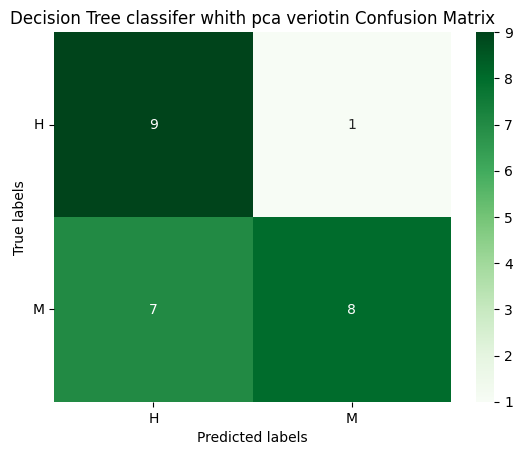

In [ ]:
#בחירת היפר פרמטרים

dt_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
                 'splitter': ['best', 'random'],
           'max_depth':[5,10,20,'None'],
           }

dt_estimator = DecisionTreeClassifier()

dt_model_pca = GridSearchCV(estimator=dt_estimator,
                  param_grid=dt_grid,
                  cv=3,
                  scoring='accuracy')
#התאמת המודל
dt_model_pca.fit(X_train_pca, y_train.iloc[:,1])

print("Best Parameters:\n", dt_model_pca.best_params_)

# Select best log model
best_dt_pca = dt_model_pca.best_estimator_

# Make predictions using the optimised parameters
dt_pred_pca = best_dt_pca.predict(X_test_pca)

print('Decision Tree classifer whith pca veriotin accuracy:', round(accuracy_score(y_test.iloc[:,1], dt_pred), 3))

cm_dt_pca =  confusion_matrix(y_test.iloc[:,1], dt_pred_pca)

ax = plt.subplot()
sns.heatmap(cm_dt_pca, annot=True, ax = ax, fmt='g', cmap='Greens')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Decision Tree classifer whith pca veriotin Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels, rotation=360);


לאחר הרצת כל המודלים, נבנה גרפים וטבלה בכדי לבדוק את תוצאות ההרצה שלנו.

נמדוד את מידת הצלחת המודלים בחיזוי נכון על ידי המדדים:

acurancy, precision, recall, f1, roc.

In [ ]:
def graf(data, nameY):
    courses = list(data.keys())
    values = list(data.values())

    fig = plt.figure(figsize=(15, 5))

    # creating the bar plot
    plt.bar(courses, values, color='maroon',
            width=0.4)

    plt.xlabel("classify")
    plt.ylabel(nameY)
    plt.title("result classify of kind "+ nameY)
    plt.show()

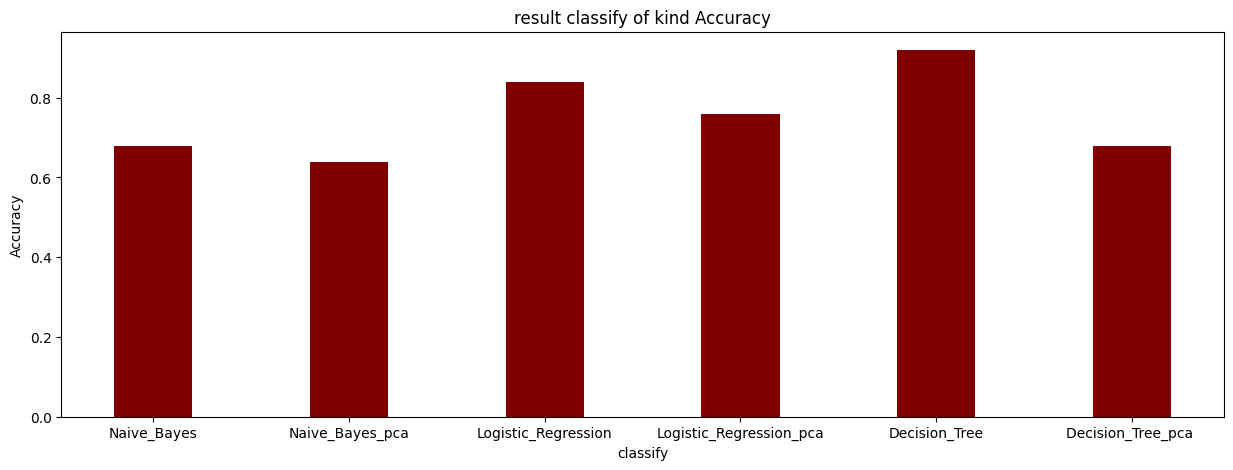

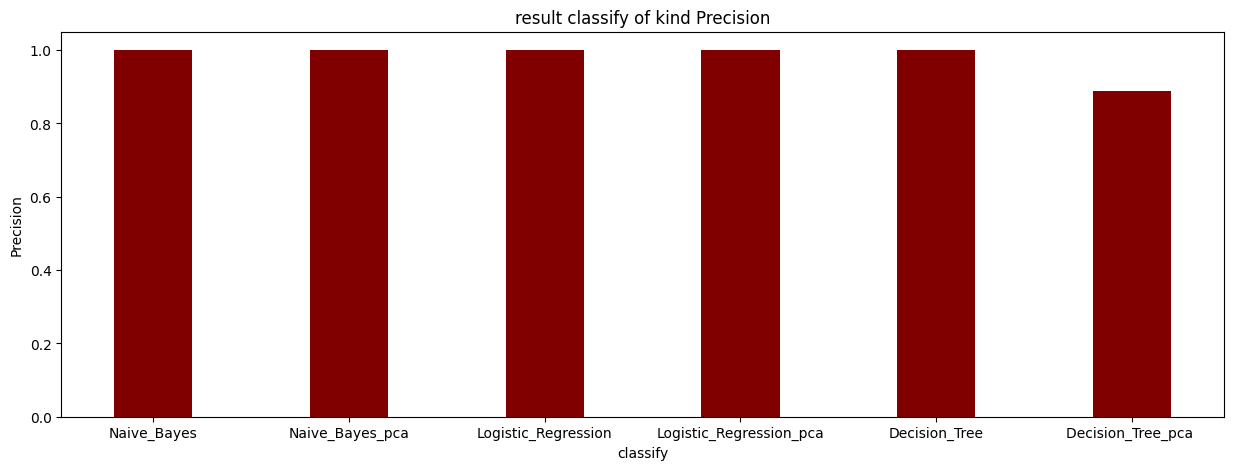

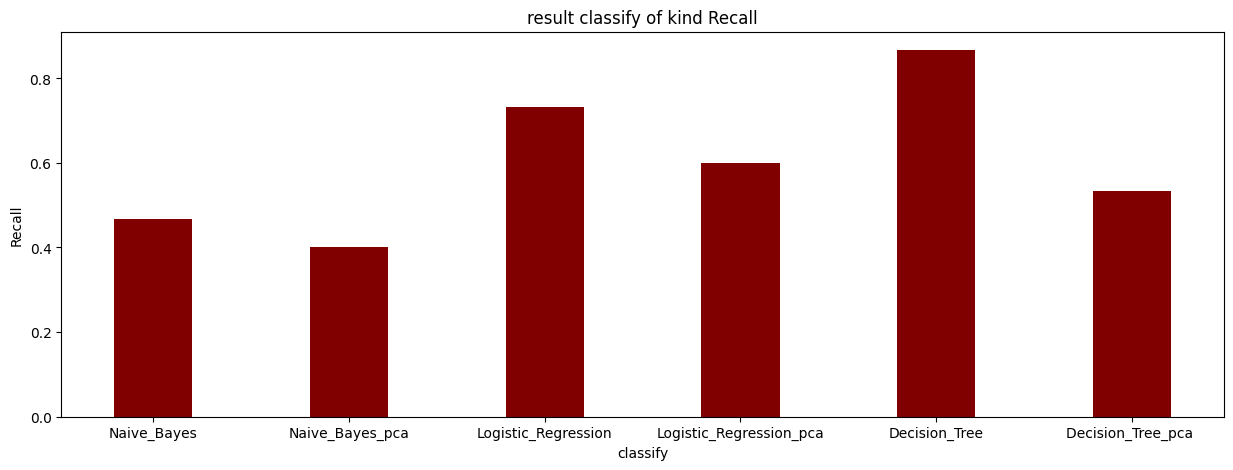

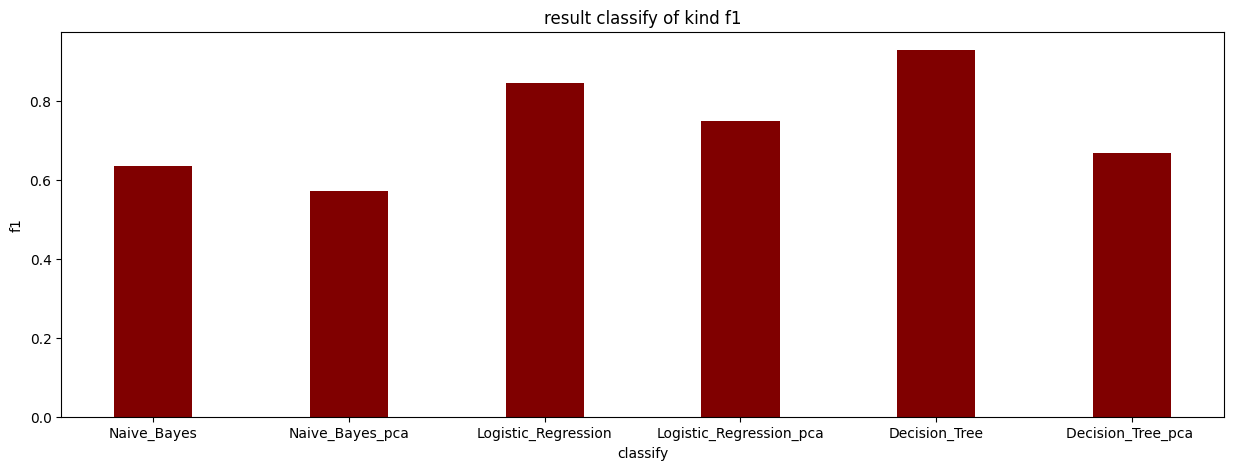

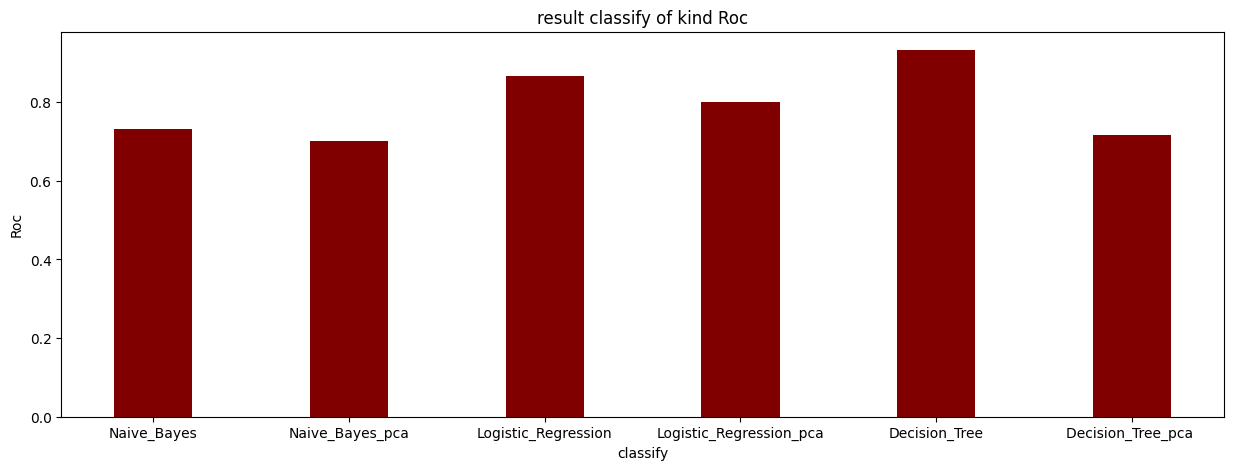

In [ ]:
# creating the dataset

data_Accuracy = {'Naive_Bayes': round(accuracy_score(y_test.iloc[:,1], nb_pred), 3),
       'Naive_Bayes_pca': round(accuracy_score(y_test.iloc[:,1], nb_pred_pca), 3),
       'Logistic_Regression':round(accuracy_score(y_test.iloc[:,1], log_pred), 3),
       'Logistic_Regression_pca':round(accuracy_score(y_test.iloc[:,1], log_pred_pca), 3),
       'Decision_Tree':round(accuracy_score(y_test.iloc[:,1], dt_pred), 3),
       'Decision_Tree_pca ':round(accuracy_score(y_test.iloc[:,1], dt_pred_pca), 3) }

data_precision = {'Naive_Bayes': round(precision_score(y_test.iloc[:,1], nb_pred), 3),
       'Naive_Bayes_pca': round(precision_score(y_test.iloc[:,1], nb_pred_pca), 3),
       'Logistic_Regression':round(precision_score(y_test.iloc[:,1], log_pred), 3),
       'Logistic_Regression_pca':round(precision_score(y_test.iloc[:,1], log_pred_pca), 3),
       'Decision_Tree':round(precision_score(y_test.iloc[:,1], dt_pred), 3),
       'Decision_Tree_pca ':round(precision_score(y_test.iloc[:,1], dt_pred_pca), 3) }

data_recall ={ 'Naive_Bayes': round(recall_score(y_test.iloc[:,1], nb_pred), 3),
       'Naive_Bayes_pca': round(recall_score(y_test.iloc[:,1], nb_pred_pca), 3),
       'Logistic_Regression':round(recall_score(y_test.iloc[:,1], log_pred), 3),
       'Logistic_Regression_pca':round(recall_score(y_test.iloc[:,1], log_pred_pca), 3),
       'Decision_Tree':round(recall_score(y_test.iloc[:,1], dt_pred), 3),
       'Decision_Tree_pca ':round(recall_score(y_test.iloc[:,1], dt_pred_pca), 3) }


data_f1 = {'Naive_Bayes': round(f1_score(y_test.iloc[:,1], nb_pred), 3),
       'Naive_Bayes_pca': round(f1_score(y_test.iloc[:,1], nb_pred_pca), 3),
       'Logistic_Regression':round(f1_score(y_test.iloc[:,1], log_pred), 3),
       'Logistic_Regression_pca':round(f1_score(y_test.iloc[:,1], log_pred_pca), 3),
       'Decision_Tree':round(f1_score(y_test.iloc[:,1], dt_pred), 3),
       'Decision_Tree_pca ':round(f1_score(y_test.iloc[:,1], dt_pred_pca), 3) }


data_roc = { 'Naive_Bayes': round(roc_auc_score(y_test.iloc[:,1], nb_pred), 3),
       'Naive_Bayes_pca': round(roc_auc_score(y_test.iloc[:,1], nb_pred_pca), 3),
       'Logistic_Regression':round(roc_auc_score(y_test.iloc[:,1], log_pred), 3),
       'Logistic_Regression_pca':round(roc_auc_score(y_test.iloc[:,1], log_pred_pca), 3),
       'Decision_Tree':round(roc_auc_score(y_test.iloc[:,1], dt_pred), 3),
       'Decision_Tree_pca ':round(roc_auc_score(y_test.iloc[:,1], dt_pred_pca), 3) }

graf(data_Accuracy, "Accuracy")
graf(data_precision, "Precision")
graf(data_recall, "Recall")
graf(data_f1, "f1")
graf(data_roc, "Roc")




In [ ]:
factors=np.array([list(data_Accuracy.values()),list(data_precision.values()),list(data_recall.values()),list(data_f1.values()),list(data_roc.values())])
scores=['Accuracy','precision','recall','f1','roc']
models=['Naive_Bayes','Naive_Bayes_pca','Logistic_Regression','Logistic_Regression_pca','Decision_Tree','Decision_Tree_pca']
Success_factors=pd.DataFrame(data=factors,index=scores,columns=models)
Success_factors

,Naive_Bayes,Naive_Bayes_pca,Logistic_Regression,Logistic_Regression_pca,Decision_Tree,Decision_Tree_pca
Accuracy,0.680,0.640,0.840,0.76,0.920,0.680
precision,1.000,1.000,1.000,1.00,1.000,0.889
recall,0.467,0.400,0.733,0.60,0.867,0.533
f1,0.636,0.571,0.846,0.75,0.929,0.667
roc,0.733,0.700,0.867,0.80,0.933,0.717


הדפסת טבלה וגרפים לסיכום סופי וניתוח תוצאות:

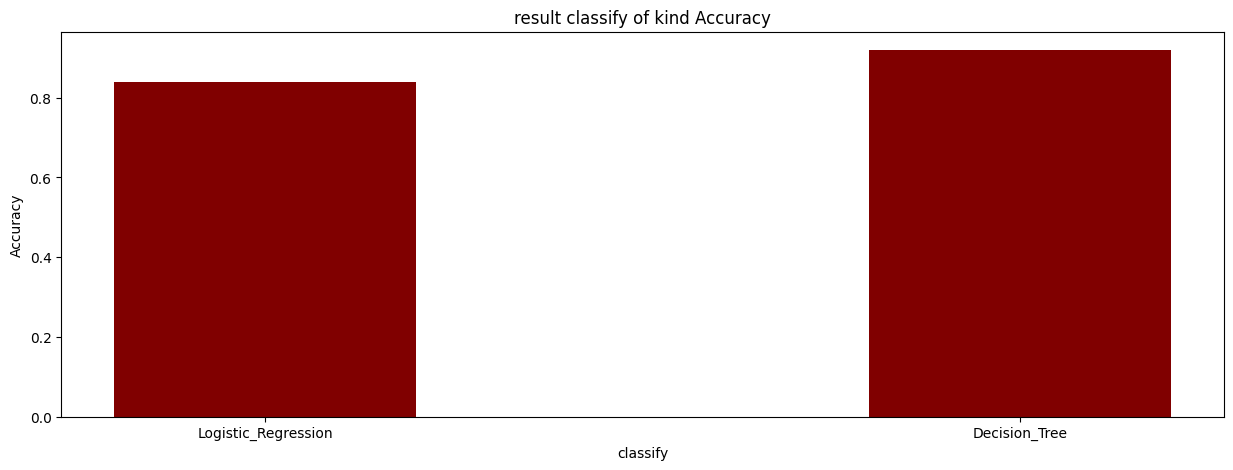

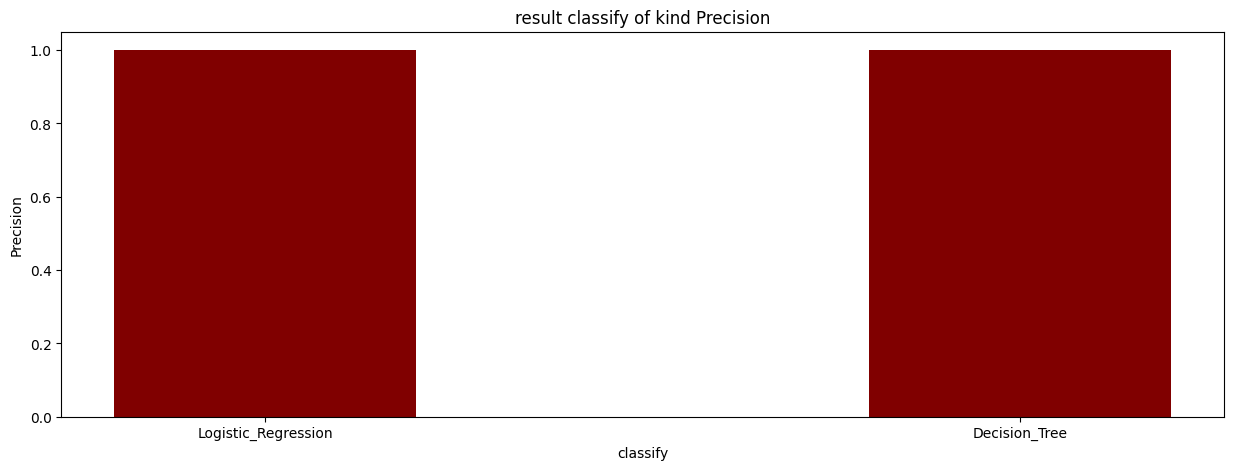

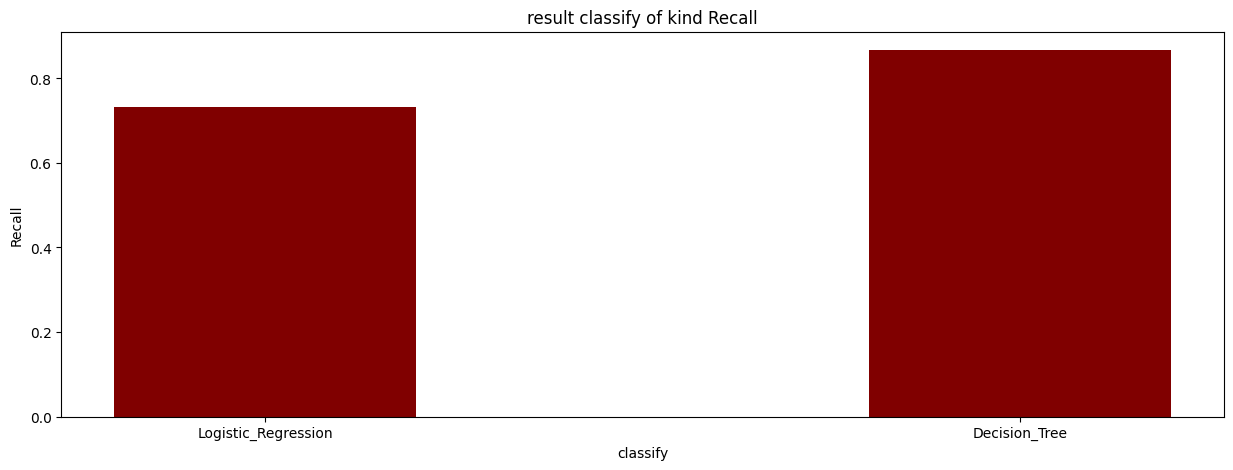

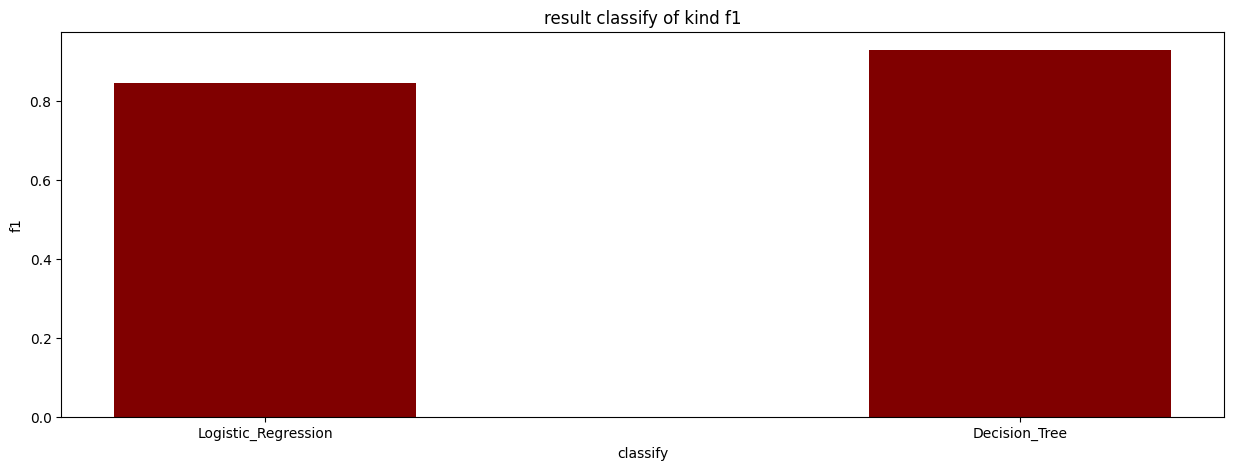

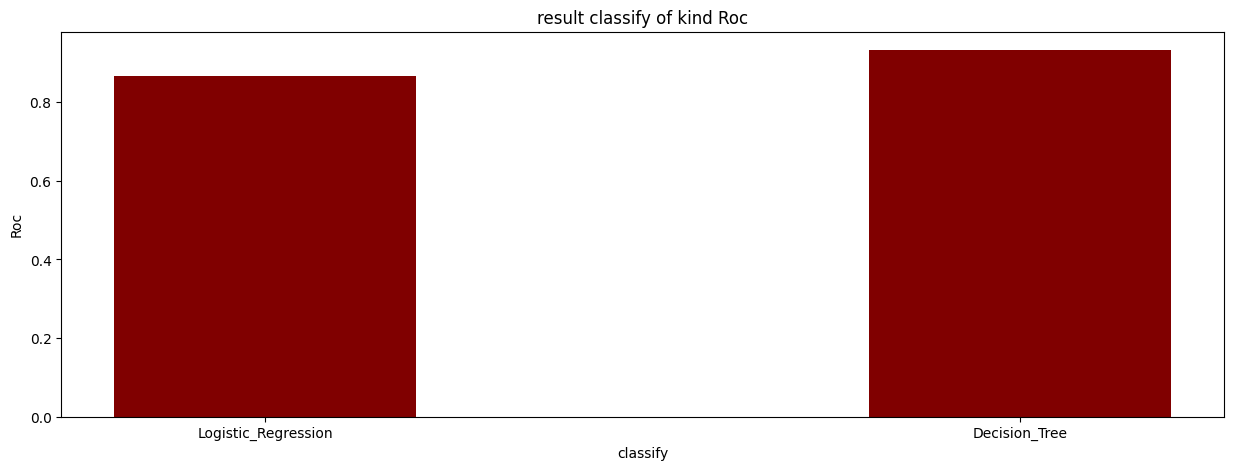

In [ ]:
# creating the dataset

data_Accuracy = {'Logistic_Regression':round(accuracy_score(y_test.iloc[:,1], log_pred), 3),
       'Decision_Tree':round(accuracy_score(y_test.iloc[:,1], dt_pred), 3)}
data_precision = {'Logistic_Regression':round(precision_score(y_test.iloc[:,1], log_pred), 3),
       'Decision_Tree':round(precision_score(y_test.iloc[:,1], dt_pred), 3)}
data_recall ={'Logistic_Regression':round(recall_score(y_test.iloc[:,1], log_pred), 3),
       'Decision_Tree':round(recall_score(y_test.iloc[:,1], dt_pred), 3)}

data_f1 = {'Logistic_Regression':round(f1_score(y_test.iloc[:,1], log_pred), 3),
       'Decision_Tree':round(f1_score(y_test.iloc[:,1], dt_pred), 3)}

data_roc = {'Logistic_Regression':round(roc_auc_score(y_test.iloc[:,1], log_pred), 3),
       'Decision_Tree':round(roc_auc_score(y_test.iloc[:,1], dt_pred), 3)}
graf(data_Accuracy, "Accuracy")
graf(data_precision, "Precision")
graf(data_recall, "Recall")
graf(data_f1, "f1")
graf(data_roc, "Roc")




In [ ]:
factors=np.array([list(data_Accuracy.values()),list(data_precision.values()),list(data_recall.values()),list(data_f1.values()),list(data_roc.values())])
scores=['Accuracy','precision','recall','f1','roc']
models=['Logistic_Regression','Decision_Tree']
Success_factors=pd.DataFrame(data=factors,index=scores,columns=models)
Success_factors

,Logistic_Regression,Decision_Tree
Accuracy,0.840,0.920
precision,1.000,1.000
recall,0.733,0.867
f1,0.846,0.929
roc,0.867,0.933


ניתן לראות כי לרוב ההרצה עם
pca

הובילה לירידה באיכות החיזוי.

לכן אנו מבינות שהורדת המימדים באופן שנעשתה לא מוצלחת, ננסה לבצע הורדת מימדים באמצעות

k-means.

**K-Means Clustering**

בשלב ראשון ננסה לבדוק איזה מספר קבוצות יתן לנו את התוצאות הטובות ביותר:


In [ ]:
#בניית מילון לאכסון הנתונים:
dic={}
data_list=[]

In [ ]:

#מדד הבדיקה הוא
#accuracy
km_grid = {'n_clusters': [2,3,4,5,6,7,8,9,10]}
km_estimator = KMeans(random_state=0)

km_model = GridSearchCV(estimator=km_estimator,
                  param_grid=km_grid,
                  cv=3,
                  scoring='accuracy')
#התאמת המודל
km_model.fit(X_train_scl)

print("Best Parameters:\n", km_model.best_params_)

# Select best log model
best_km = km_model.best_estimator_

# Make predictions using the optimised parameters
km_pred = best_km.predict(X_test_scl)

print('k-means accuracy:', round(accuracy_score(y_test.iloc[:,1], km_pred), 3))


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/

Best Parameters:
 {'n_clusters': 2}
k-means accuracy: 0.6


In [ ]:
#שמירת הנתונים
data_list.append(km_model.best_params_['n_clusters'])
data_list.append(round(accuracy_score(y_test.iloc[:,1], km_pred), 3))
dic['accuracy']=data_list.copy()
data_list.clear()

In [ ]:
#מדד הבדיקה הוא
#precision
km_model = GridSearchCV(estimator=km_estimator,
                  param_grid=km_grid,
                  cv=3,
                  scoring='precision')
#התאמת המודל
km_model.fit(X_train_scl)

print("Best Parameters:\n", km_model.best_params_)

# בחירת המודל הטוב ביותר
best_km = km_model.best_estimator_

km_pred = best_km.predict(X_test_scl)

print('k-means precision:', round(precision_score(y_test.iloc[:,1], km_pred), 3))


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/

Best Parameters:
 {'n_clusters': 2}
k-means precision: 0.727


In [ ]:
#שמירת הנתונים
data_list.append(km_model.best_params_['n_clusters'])
data_list.append(round(precision_score(y_test.iloc[:,1], km_pred), 3))
dic['precision']=data_list.copy()
data_list.clear()


In [ ]:
#מדד הבדיקה הוא
#recall
km_grid = {'n_clusters': [2,3,4,5,6,7,8,9,10]}
km_estimator = KMeans(random_state=0)

km_model = GridSearchCV(estimator=km_estimator,
                  param_grid=km_grid,
                  cv=3,
                  scoring='recall')
#התאמת המודל
km_model.fit(X_train_scl)

print("Best Parameters:\n", km_model.best_params_)

# בחירת המודל הטוב ביותר
best_km = km_model.best_estimator_

km_pred = best_km.predict(X_test_scl)

print('k-means recall:', round(recall_score(y_test.iloc[:,1], km_pred), 3))


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/

Best Parameters:
 {'n_clusters': 2}
k-means recall: 0.533


In [ ]:
#שמירת הנתונים
data_list.append(km_model.best_params_['n_clusters'])
data_list.append(round(recall_score(y_test.iloc[:,1], km_pred), 3))
dic['recall']=data_list.copy()
data_list.clear()


In [ ]:
#מדד הבדיקה הוא
#f1
km_grid = {'n_clusters': [2,3,4,5,6,7,8,9,10]}
km_estimator = KMeans(random_state=0)

km_model = GridSearchCV(estimator=km_estimator,
                  param_grid=km_grid,
                  cv=3,
                  scoring='f1')
#התאמת המודל
km_model.fit(X_train_scl)

print("Best Parameters:\n", km_model.best_params_)

# בחירת המודל הטוב ביותר
best_km = km_model.best_estimator_

km_pred = best_km.predict(X_test_scl)

print('k-means f1:', round(f1_score(y_test.iloc[:,1], km_pred), 3))


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/

Best Parameters:
 {'n_clusters': 2}
k-means f1: 0.615


In [ ]:
#שמירת הנתונים
data_list.append(km_model.best_params_['n_clusters'])
data_list.append(round(f1_score(y_test.iloc[:,1], km_pred), 3))
dic['f1']=data_list.copy()
data_list.clear()


In [ ]:
#מדד הבדיקה הוא
#roc
km_grid = {'n_clusters': [2,3,4,5,6,7,8,9,10]}
km_estimator = KMeans(random_state=0)

km_model = GridSearchCV(estimator=km_estimator,
                  param_grid=km_grid,
                  cv=3,
                  scoring='roc_auc')
#התאמת המודל
km_model.fit(X_train_scl)

print("Best Parameters:\n", km_model.best_params_)

# בחירת המודל הטוב ביותר
best_km = km_model.best_estimator_

km_pred = best_km.predict(X_test_scl)

print('k-means roc:', round(roc_auc_score(y_test.iloc[:,1], km_pred), 3))


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/

Best Parameters:
 {'n_clusters': 2}
k-means roc: 0.617


In [ ]:
#שמירת הנתונים
data_list.append(km_model.best_params_['n_clusters'])
data_list.append(round(roc_auc_score(y_test.iloc[:,1], km_pred), 3))
dic['roc']=data_list.copy()
data_list.clear()

In [ ]:
#סידור הנתונים והצגתם:

best_param=pd.DataFrame(data=dic,index=['n_clusters','index value'])
best_param

,accuracy,precision,recall,f1,roc
n_clusters,2.0,2.000,2.000,2.000,2.000
index value,0.6,0.727,0.533,0.615,0.617


לפי כל המדדים המודל עובד הכי טוב כאשר מרכזים אותם ל-2 מרכזים.

לכן נעבוד עם מודל זה.

In [ ]:
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(X_train)
centers = kmeans.cluster_centers_
labels=kmeans.labels_
num_features=kmeans.n_features_in_
features_names=kmeans.feature_names_in_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
len(centers[1])

54628

In [ ]:
len(labels)

74